**Redes Neuronales Convolucionales**
- Nombre: Rosario Ramos Camero

### 1. Importar datos y librerías

In [1]:
# Importar librerías y data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras.utils import plot_model, to_categorical

from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np

from sklearn.utils import shuffle


# semilla aleatoria para reproducibilidad
np.random.seed(7)

### 2. Definir funciones para crear modelos convolucionales con distintas características

In [2]:
# Funciones para crear modelos convolucionales
def get_model_origin(filters, 
                    n_classes, 
                    k=3, 
                    name="my_model", 
                    padding="same", 
                    batch_norm=False, 
                    dropout=None):

    input_layer = Input(shape=(28,28,1))

    x = Conv2D(filters[0], (k,k), activation="relu", padding=padding)(input_layer)

    if batch_norm: x = BatchNormalization()(x)
    x = MaxPooling2D(2,2)(x)
    
    if dropout is not None: x = Dropout(dropout)(x)
    
    for n in filters[1:]:
        x = Conv2D(n, (k,k), activation="relu", padding=padding)(x)
        if batch_norm: x = BatchNormalization()(x)
        x = MaxPooling2D(2,2)(x)
        if dropout is not None: x = Dropout(dropout)(x)

    x = Flatten()(x)
    x = Dense(100, activation="relu")(x)
    output_layer = Dense(n_classes, activation="softmax")(x)
    
    model = Model(inputs=input_layer, outputs=output_layer, name=name)

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=['accuracy']
                  )
    return model

def get_model_add_one_conv2D(filters, 
                    n_classes, 
                    k=3, 
                    name="my_model", 
                    padding="same", 
                    batch_norm=False, 
                    dropout=None):

    input_layer = Input(shape=(28,28,1))

    x = Conv2D(filters[0], (k,k), activation="relu", padding=padding)(input_layer)
    x = Conv2D(filters[0], (k,k), activation="relu", padding=padding)(x)

    if batch_norm: x = BatchNormalization()(x)
    x = MaxPooling2D(2,2)(x)
    
    if dropout is not None: x = Dropout(dropout)(x)
    
    for n in filters[1:]:
        x = Conv2D(n, (k,k), activation="relu", padding=padding)(x)
        x = Conv2D(filters[0], (k,k), activation="relu", padding=padding)(x)
        if batch_norm: x = BatchNormalization()(x)
        x = MaxPooling2D(2,2)(x)
        if dropout is not None: x = Dropout(dropout)(x)

    x = Flatten()(x)
    x = Dense(100, activation="relu")(x)
    output_layer = Dense(n_classes, activation="softmax")(x)
    
    model = Model(inputs=input_layer, outputs=output_layer, name=name)

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=['accuracy']
                  )
    return model

def get_model_batch_normalization_after_pooling(filters, 
                    n_classes, 
                    k=3, 
                    name="my_model", 
                    padding="same", 
                    batch_norm=False, 
                    dropout=None):

    input_layer = Input(shape=(28,28,1))

    x = Conv2D(filters[0], (k,k), activation="relu", padding=padding)(input_layer)
    x = MaxPooling2D(2,2)(x)
    if batch_norm: x = BatchNormalization()(x)
    
    
    if dropout is not None: x = Dropout(dropout)(x)
    
    for n in filters[1:]:
        x = Conv2D(n, (k,k), activation="relu", padding=padding)(x)
        x = MaxPooling2D(2,2)(x)
        if batch_norm: x = BatchNormalization()(x)
        
        if dropout is not None: x = Dropout(dropout)(x)

    x = Flatten()(x)
    x = Dense(100, activation="relu")(x)
    output_layer = Dense(n_classes, activation="softmax")(x)
    
    model = Model(inputs=input_layer, outputs=output_layer, name=name)

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=['accuracy']
                  )
    return model

def get_model_optimizerSGD(filters, 
                    n_classes, 
                    k=3, 
                    name="my_model", 
                    padding="same", 
                    batch_norm=False, 
                    dropout=None):

    input_layer = Input(shape=(28,28,1))

    x = Conv2D(filters[0], (k,k), activation="relu", padding=padding)(input_layer)
    if batch_norm: x = BatchNormalization()(x)
    x = MaxPooling2D(2,2)(x)
    
    
    if dropout is not None: x = Dropout(dropout)(x)
    
    for n in filters[1:]:
        x = Conv2D(n, (k,k), activation="relu", padding=padding)(x)
        if batch_norm: x = BatchNormalization()(x)
        x = MaxPooling2D(2,2)(x)
        if dropout is not None: x = Dropout(dropout)(x)

    x = Flatten()(x)
    x = Dense(100, activation="relu")(x)
    output_layer = Dense(n_classes, activation="softmax")(x)
    
    model = Model(inputs=input_layer, outputs=output_layer, name=name)

    model.compile(optimizer=SGD(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=['accuracy']
                  )
    return model

def get_model_optimizerRMSprop(filters, 
                    n_classes, 
                    k=3, 
                    name="my_model", 
                    padding="same", 
                    batch_norm=False, 
                    dropout=None):

    input_layer = Input(shape=(28,28,1))

    x = Conv2D(filters[0], (k,k), activation="relu", padding=padding)(input_layer)
    if batch_norm: x = BatchNormalization()(x)
    x = MaxPooling2D(2,2)(x)
    
    
    if dropout is not None: x = Dropout(dropout)(x)
    
    for n in filters[1:]:
        x = Conv2D(n, (k,k), activation="relu", padding=padding)(x)
        if batch_norm: x = BatchNormalization()(x)
        x = MaxPooling2D(2,2)(x)
        if dropout is not None: x = Dropout(dropout)(x)

    x = Flatten()(x)
    x = Dense(100, activation="relu")(x)
    output_layer = Dense(n_classes, activation="softmax")(x)
    
    model = Model(inputs=input_layer, outputs=output_layer, name=name)

    model.compile(optimizer=RMSprop(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=['accuracy']
                  )
    return model

def get_model_optimizerAdagrad(filters, 
                    n_classes, 
                    k=3, 
                    name="my_model", 
                    padding="same", 
                    batch_norm=False, 
                    dropout=None):

    input_layer = Input(shape=(28,28,1))

    x = Conv2D(filters[0], (k,k), activation="relu", padding=padding)(input_layer)
    if batch_norm: x = BatchNormalization()(x)
    x = MaxPooling2D(2,2)(x)
    
    
    if dropout is not None: x = Dropout(dropout)(x)
    
    for n in filters[1:]:
        x = Conv2D(n, (k,k), activation="relu", padding=padding)(x)
        if batch_norm: x = BatchNormalization()(x)
        x = MaxPooling2D(2,2)(x)
        if dropout is not None: x = Dropout(dropout)(x)

    x = Flatten()(x)
    x = Dense(100, activation="relu")(x)
    output_layer = Dense(n_classes, activation="softmax")(x)
    
    model = Model(inputs=input_layer, outputs=output_layer, name=name)

    model.compile(optimizer=Adagrad(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=['accuracy']
                  )
    return model

### 3. Realizar el preprocesamiento de la data

In [3]:
# A. Creación de la data de entrenamiento, validación y testing
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

n_val = int(0.1*len(x_train))

x_val = x_train[:n_val]
x_train = x_train[n_val:]

y_val = y_train[:n_val]
y_train = y_train[n_val:]

print("Training: Data ({}), Labels ({})".format(x_train.shape, y_train.shape))
print("Validation: Data ({}), Labels ({})".format(x_val.shape, y_val.shape))
print("Testing: Data ({}), Labels ({})".format(x_test.shape, y_test.shape))

# B. Normalización de la data
x_train = np.expand_dims(x_train, axis=-1).astype("float32")/255.0
x_val = np.expand_dims(x_val, axis=-1).astype("float32")/255.0
x_test = np.expand_dims(x_test, axis=-1).astype("float32")/255.0

# C. Establecer las clases
name_labels = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat', 
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

n_classes = len(name_labels)


# D. Generador de datos para entrenamiento y validación

batch_size = 64

gen_train = ImageDataGenerator(horizontal_flip=True,
                               vertical_flip=True)
# Generador para Validación
gen_val = ImageDataGenerator()

data_gen_train = gen_train.flow(x_train, y_train, batch_size=batch_size)
data_gen_val = gen_val.flow(x_val, y_val, batch_size=batch_size)

x_temp, y_tem = data_gen_train.next()

4431872/4422102 [==============================] - 0s 0us/step
Training: Data ((54000, 28, 28)), Labels ((54000, 10))
Validation: Data ((6000, 28, 28)), Labels ((6000, 10))
Testing: Data ((10000, 28, 28)), Labels ((10000, 10))


## Comparación con cambios en componentes de la Arquitectura


*   get_model_origin -> código igual al original
*   get_model_add_one_conv2D -> Se agrega una capa de convolución seguida de otra
*   get_model_batch_normalization_after_pooling -> se prueba colocar el batch normalization después del pooling



### a. Crear los modelos

In [10]:
# Original
model_cnn_vanilla_1 = get_model_origin(filters=[32], 
                                n_classes=n_classes, 
                                name="Vanilla_CNN_origin")
# Batch normalization después del pooling
model_cnn_vanilla_2 = get_model_batch_normalization_after_pooling(filters=[32, 64], 
                                n_classes=n_classes, 
                                name="Vanilla_CNN_2_BN_after_pooling",
                                batch_norm=True)
# Se agrega una capa de convolución adicional
model_cnn_vanilla_3 = get_model_add_one_conv2D(filters=[32, 64], 
                                      n_classes=n_classes,                                       
                                      name="Vanilla_CNN_3_extra_conv2D",
                                      batch_norm=True)

## Parámetros
print("Model:{}, Parameters:{}".format(model_cnn_vanilla_1.name,
                                       model_cnn_vanilla_1.count_params()))

print("Model:{}, Parameters:{}".format(model_cnn_vanilla_2.name,
                                       model_cnn_vanilla_2.count_params()))

print("Model:{}, Parameters:{}".format(model_cnn_vanilla_3.name,
                                       model_cnn_vanilla_3.count_params()))

Model:Vanilla_CNN_origin, Parameters:628630
Model:Vanilla_CNN_2_BN_after_pooling, Parameters:333910
Model:Vanilla_CNN_3_extra_conv2D, Parameters:204694


### b. Configuración del modelo

In [6]:
def get_ckpt(ckpt_name):
  return ModelCheckpoint(ckpt_name,
                         mode="max", 
                         save_best_only=True, # guardo el mejor modelo
                         monitor="val_accuracy", 
                         verbose=1)
  
mode_autosave_cnn_vanilla_1 = get_ckpt("classification_model_cnn_vanilla_1.h5")
mode_autosave_cnn_vanilla_2 = get_ckpt("classification_model_cnn_vanilla_2.h5")
mode_autosave_cnn_vanilla_3 = get_ckpt("classification_model_cnn_vanilla_3.h5")

# EarlyStopping terminara el entrenamiento si no existe una mejora
early_stopping = EarlyStopping(patience=40, 
                               verbose=1, 
                               mode="auto")

callbacks_cnn_vanilla_1 = [mode_autosave_cnn_vanilla_1, early_stopping]
callbacks_cnn_vanilla_2 = [mode_autosave_cnn_vanilla_2, early_stopping]
callbacks_cnn_vanilla_3 = [mode_autosave_cnn_vanilla_3, early_stopping]

### c. Entrenamiento del modelo

In [7]:
history_cnn_vanilla_1 = model_cnn_vanilla_1.fit(data_gen_train,
                                                epochs=200,                                                 
                                                validation_data=data_gen_val,                                                
                                                callbacks=callbacks_cnn_vanilla_1
                                                )
history_cnn_vanilla_2 = model_cnn_vanilla_2.fit(data_gen_train,
                                                epochs=200,                                                 
                                                validation_data=data_gen_val,                                                
                                                callbacks=callbacks_cnn_vanilla_2
                                                )
history_cnn_vanilla_3 = model_cnn_vanilla_3.fit(data_gen_train,
                                                epochs=200,                                                 
                                                validation_data=data_gen_val,                                                
                                                callbacks=callbacks_cnn_vanilla_3
                                                )

Epoch 1/200
839/844 [============================>.] - ETA: 0s - loss: 0.5338 - accuracy: 0.8125
Epoch 1: val_accuracy improved from -inf to 0.86150, saving model to classification_model_cnn_vanilla_1.h5
844/844 [==============================] - 15s 5ms/step - loss: 0.5334 - accuracy: 0.8126 - val_loss: 0.3930 - val_accuracy: 0.8615
Epoch 2/200
844/844 [==============================] - ETA: 0s - loss: 0.3584 - accuracy: 0.8735
Epoch 2: val_accuracy improved from 0.86150 to 0.88683, saving model to classification_model_cnn_vanilla_1.h5
844/844 [==============================] - 4s 5ms/step - loss: 0.3584 - accuracy: 0.8735 - val_loss: 0.3255 - val_accuracy: 0.8868
Epoch 3/200
836/844 [============================>.] - ETA: 0s - loss: 0.3181 - accuracy: 0.8859
Epoch 3: val_accuracy improved from 0.88683 to 0.88817, saving model to classification_model_cnn_vanilla_1.h5
844/844 [==============================] - 4s 5ms/step - loss: 0.3180 - accuracy: 0.8859 - val_loss: 0.3088 - val_accur

### d. Evolución del modelo durante el entrenamiento

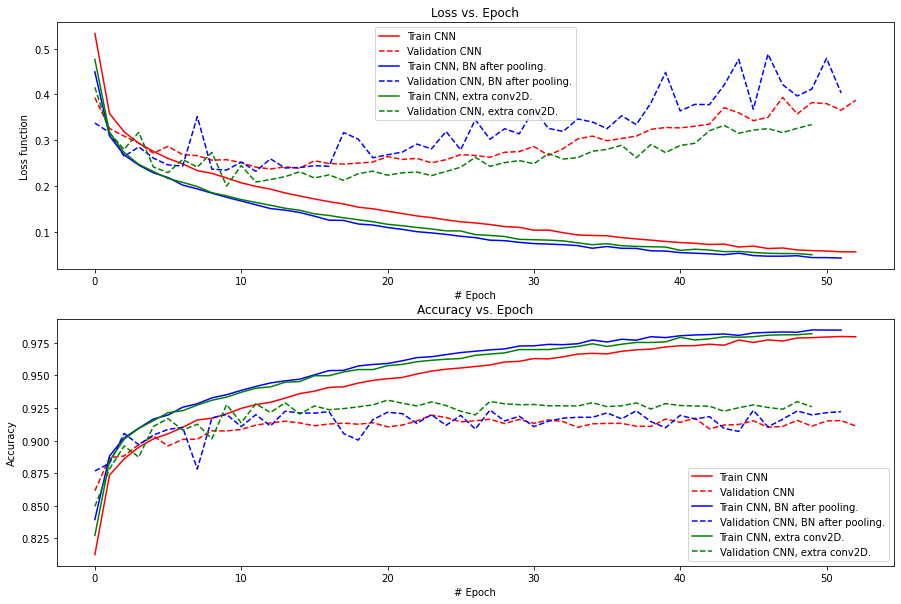

In [8]:
fig_labels = ["Train CNN", 
              "Validation CNN",              
              "Train CNN, BN after pooling.",
              "Validation CNN, BN after pooling.",
              "Train CNN, extra conv2D.",
              "Validation CNN, extra conv2D."]

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(history_cnn_vanilla_1.history["loss"], "r-")
plt.plot(history_cnn_vanilla_1.history["val_loss"], "r--")
plt.plot(history_cnn_vanilla_2.history["loss"], "b-")
plt.plot(history_cnn_vanilla_2.history["val_loss"], "b--")
plt.plot(history_cnn_vanilla_3.history["loss"], "g-")
plt.plot(history_cnn_vanilla_3.history["val_loss"], "g--")
plt.xlabel("# Epoch")
plt.ylabel("Loss function")
plt.legend(fig_labels)
plt.title("Loss vs. Epoch")

plt.subplot(2,1,2)
plt.plot(history_cnn_vanilla_1.history["accuracy"], "r-")
plt.plot(history_cnn_vanilla_1.history["val_accuracy"], "r--")
plt.plot(history_cnn_vanilla_2.history["accuracy"], "b-")
plt.plot(history_cnn_vanilla_2.history["val_accuracy"], "b--")
plt.plot(history_cnn_vanilla_3.history["accuracy"], "g-")
plt.plot(history_cnn_vanilla_3.history["val_accuracy"], "g--")
plt.xlabel("# Epoch")
plt.ylabel("Accuracy")
plt.legend(fig_labels)
plt.title("Accuracy vs. Epoch")

plt.show()

### e. Probando el modelo

In [9]:
gen_test = ImageDataGenerator()

data_gen_test = gen_train.flow(x_test, y_test, batch_size=batch_size)


print("Entrenamiento:")
scores_train_1 = model_cnn_vanilla_1.evaluate(data_gen_train)
scores_train_2 = model_cnn_vanilla_2.evaluate(data_gen_train)
scores_train_3 = model_cnn_vanilla_3.evaluate(data_gen_train)

print("Validación:")
scores_val_1 = model_cnn_vanilla_1.evaluate(data_gen_val)
scores_val_2 = model_cnn_vanilla_2.evaluate(data_gen_val)
scores_val_3 = model_cnn_vanilla_3.evaluate(data_gen_val)

print("Pruebas:")
scores_test_1 = model_cnn_vanilla_1.evaluate(data_gen_test)
scores_test_2 = model_cnn_vanilla_2.evaluate(data_gen_test)
scores_test_3 = model_cnn_vanilla_3.evaluate(data_gen_test)

Entrenamiento:
844/844 [==============================] - 4s 4ms/step - loss: 0.0489 - accuracy: 0.9825
Validación:
94/94 [==============================] - 0s 4ms/step - loss: 0.3340 - accuracy: 0.9258
Pruebas:
157/157 [==============================] - 1s 5ms/step - loss: 0.3574 - accuracy: 0.9242


## Resultados:


*   De acuerdo a los datos de validación, el modelo que obtuvo un mejor performance en cuanto a una menor función de pérdida y un accuracy más alto fue el tercer modelo, en el cual se realiza la normalización de los datos y se agrega una capa convolutiva adicional.
*   Al añadir una capa convolutiva adicional se disminuye la dimensión y esto se refleja en el número de parámetros que pasa de 628630 a a 204694.
*   A partir de la época 9, como se ve en el gráfico, los resultados de la data de entrenamiento y validación comienzan a distanciarse reflejando cada vez más un overfitting a la data de entrenamiento.



## Comparación entre diferentes optimizadores


*   get_model_origin (ADAM)
*   get_model_optimizerSGD
*   get_model_optimizerRMSprop
*   get_model_optimizerAdagrad 

### a. Crear los modelos

In [11]:
# Adam
model_cnn_vanilla_1 = get_model_origin(filters=[32,64], 
                                n_classes=n_classes, 
                                name="Vanilla_CNN_Adam",
                                batch_norm=True,
                                dropout=0.3)
# SGD
model_cnn_vanilla_2 = get_model_optimizerSGD(filters=[32, 64], 
                                n_classes=n_classes, 
                                name="Vanilla_CNN_2_SGD",
                                batch_norm=True,
                                dropout=0.3)
# RMSprop
model_cnn_vanilla_3 = get_model_optimizerRMSprop(filters=[32, 64], 
                                      n_classes=n_classes,                                       
                                      name="Vanilla_CNN_3_RMSprop",
                                      batch_norm=True,
                                      dropout=0.3)

# Adagrad
model_cnn_vanilla_4 = get_model_optimizerAdagrad(filters=[32, 64], 
                                      n_classes=n_classes,                                       
                                      name="Vanilla_CNN_4_Adagrad",
                                      batch_norm=True,
                                      dropout=0.3)

## Parámetros
print("Model:{}, Parameters:{}".format(model_cnn_vanilla_1.name,
                                       model_cnn_vanilla_1.count_params()))

print("Model:{}, Parameters:{}".format(model_cnn_vanilla_2.name,
                                       model_cnn_vanilla_2.count_params()))

print("Model:{}, Parameters:{}".format(model_cnn_vanilla_3.name,
                                       model_cnn_vanilla_3.count_params()))


print("Model:{}, Parameters:{}".format(model_cnn_vanilla_4.name,
                                       model_cnn_vanilla_4.count_params()))

Model:Vanilla_CNN_Adam, Parameters:333910
Model:Vanilla_CNN_2_SGD, Parameters:333910
Model:Vanilla_CNN_3_RMSprop, Parameters:333910
Model:Vanilla_CNN_4_Adagrad, Parameters:333910


### b. Configuración del modelo

In [13]:
def get_ckpt(ckpt_name):
  return ModelCheckpoint(ckpt_name,
                         mode="max", 
                         save_best_only=True, # guardo el mejor modelo
                         monitor="val_accuracy", 
                         verbose=1)
  
mode_autosave_cnn_vanilla_1 = get_ckpt("classification_model_cnn_vanilla_1.h5")
mode_autosave_cnn_vanilla_2 = get_ckpt("classification_model_cnn_vanilla_2.h5")
mode_autosave_cnn_vanilla_3 = get_ckpt("classification_model_cnn_vanilla_3.h5")
mode_autosave_cnn_vanilla_4 = get_ckpt("classification_model_cnn_vanilla_4.h5")

# EarlyStopping terminara el entrenamiento si no existe una mejora
early_stopping = EarlyStopping(patience=40, 
                               verbose=1, 
                               mode="auto")

callbacks_cnn_vanilla_1 = [mode_autosave_cnn_vanilla_1, early_stopping]
callbacks_cnn_vanilla_2 = [mode_autosave_cnn_vanilla_2, early_stopping]
callbacks_cnn_vanilla_3 = [mode_autosave_cnn_vanilla_3, early_stopping]
callbacks_cnn_vanilla_4 = [mode_autosave_cnn_vanilla_4, early_stopping]

### c. Entrenamiento del modelo

In [14]:
history_cnn_vanilla_1 = model_cnn_vanilla_1.fit(data_gen_train,
                                                epochs=200,                                                 
                                                validation_data=data_gen_val,                                                
                                                callbacks=callbacks_cnn_vanilla_1
                                                )
history_cnn_vanilla_2 = model_cnn_vanilla_2.fit(data_gen_train,
                                                epochs=200,                                                 
                                                validation_data=data_gen_val,                                                
                                                callbacks=callbacks_cnn_vanilla_2
                                                )
history_cnn_vanilla_3 = model_cnn_vanilla_3.fit(data_gen_train,
                                                epochs=200,                                                 
                                                validation_data=data_gen_val,                                                
                                                callbacks=callbacks_cnn_vanilla_3
                                                )

history_cnn_vanilla_4 = model_cnn_vanilla_4.fit(data_gen_train,
                                                epochs=200,                                                 
                                                validation_data=data_gen_val,                                                
                                                callbacks=callbacks_cnn_vanilla_4
                                                )

Epoch 1/200
835/844 [============================>.] - ETA: 0s - loss: 0.5586 - accuracy: 0.7993
Epoch 1: val_accuracy improved from -inf to 0.85450, saving model to classification_model_cnn_vanilla_1.h5
844/844 [==============================] - 6s 6ms/step - loss: 0.5572 - accuracy: 0.7999 - val_loss: 0.3911 - val_accuracy: 0.8545
Epoch 2/200
838/844 [============================>.] - ETA: 0s - loss: 0.3798 - accuracy: 0.8614
Epoch 2: val_accuracy improved from 0.85450 to 0.87983, saving model to classification_model_cnn_vanilla_1.h5
844/844 [==============================] - 5s 6ms/step - loss: 0.3795 - accuracy: 0.8614 - val_loss: 0.3299 - val_accuracy: 0.8798
Epoch 3/200
835/844 [============================>.] - ETA: 0s - loss: 0.3368 - accuracy: 0.8760
Epoch 3: val_accuracy improved from 0.87983 to 0.88783, saving model to classification_model_cnn_vanilla_1.h5
844/844 [==============================] - 5s 6ms/step - loss: 0.3360 - accuracy: 0.8763 - val_loss: 0.3060 - val_accura

### d. Evolución del modelo durante el entrenamiento

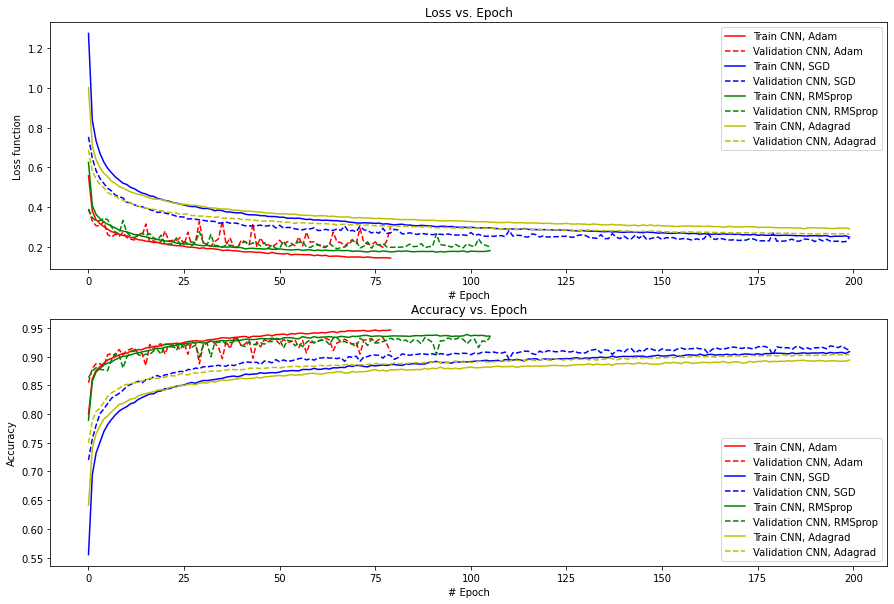

In [16]:
fig_labels = ["Train CNN, Adam", 
              "Validation CNN, Adam",              
              "Train CNN, SGD",
              "Validation CNN, SGD",
              "Train CNN, RMSprop",
              "Validation CNN, RMSprop",
              "Train CNN, Adagrad",
              "Validation CNN, Adagrad"]

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(history_cnn_vanilla_1.history["loss"], "r-")
plt.plot(history_cnn_vanilla_1.history["val_loss"], "r--")
plt.plot(history_cnn_vanilla_2.history["loss"], "b-")
plt.plot(history_cnn_vanilla_2.history["val_loss"], "b--")
plt.plot(history_cnn_vanilla_3.history["loss"], "g-")
plt.plot(history_cnn_vanilla_3.history["val_loss"], "g--")
plt.plot(history_cnn_vanilla_4.history["loss"], "y-")
plt.plot(history_cnn_vanilla_4.history["val_loss"], "y--")
plt.xlabel("# Epoch")
plt.ylabel("Loss function")
plt.legend(fig_labels)
plt.title("Loss vs. Epoch")

plt.subplot(2,1,2)
plt.plot(history_cnn_vanilla_1.history["accuracy"], "r-")
plt.plot(history_cnn_vanilla_1.history["val_accuracy"], "r--")
plt.plot(history_cnn_vanilla_2.history["accuracy"], "b-")
plt.plot(history_cnn_vanilla_2.history["val_accuracy"], "b--")
plt.plot(history_cnn_vanilla_3.history["accuracy"], "g-")
plt.plot(history_cnn_vanilla_3.history["val_accuracy"], "g--")
plt.plot(history_cnn_vanilla_4.history["accuracy"], "y-")
plt.plot(history_cnn_vanilla_4.history["val_accuracy"], "y--")
plt.xlabel("# Epoch")
plt.ylabel("Accuracy")
plt.legend(fig_labels)
plt.title("Accuracy vs. Epoch")

plt.show()

### e. Probando el modelo

In [17]:
gen_test = ImageDataGenerator()

data_gen_test = gen_train.flow(x_test, y_test, batch_size=batch_size)


print("Entrenamiento:")
scores_train_1 = model_cnn_vanilla_1.evaluate(data_gen_train)
scores_train_2 = model_cnn_vanilla_2.evaluate(data_gen_train)
scores_train_3 = model_cnn_vanilla_3.evaluate(data_gen_train)
scores_train_4 = model_cnn_vanilla_4.evaluate(data_gen_train)

print("Validación:")
scores_val_1 = model_cnn_vanilla_1.evaluate(data_gen_val)
scores_val_2 = model_cnn_vanilla_2.evaluate(data_gen_val)
scores_val_3 = model_cnn_vanilla_3.evaluate(data_gen_val)
scores_val_4 = model_cnn_vanilla_4.evaluate(data_gen_val)

print("Pruebas:")
scores_test_1 = model_cnn_vanilla_1.evaluate(data_gen_test)
scores_test_2 = model_cnn_vanilla_2.evaluate(data_gen_test)
scores_test_3 = model_cnn_vanilla_3.evaluate(data_gen_test)
scores_test_4 = model_cnn_vanilla_4.evaluate(data_gen_test)

Entrenamiento:
844/844 [==============================] - 3s 4ms/step - loss: 0.2605 - accuracy: 0.9042
Validación:
94/94 [==============================] - 0s 4ms/step - loss: 0.2647 - accuracy: 0.9035
Pruebas:
157/157 [==============================] - 1s 4ms/step - loss: 0.2993 - accuracy: 0.8904


## Resultados:


*   En base a los resultados de la data de validación, se encuentra que aplicando la normalización de los datos y el dropout, el mejor optimizador para los datos es el RMSprop. Con este optimizador se logra el menor valor de función de pérdida y el mayor accuracy.
*   Adicionalmente, como se muestra en el gráfico, a diferencia del optimizador de Adams, no se encuentra grandes niveles de diferencia entre los resultados del entrenamiento y la validación.
*   SGD y Adagrad a esar de mantener valores cerc anos en la data de entrenamiento y validación, no logran acercarse al valor de pérdida y accuracy de los otros dos optimizadores.

